## **Importing algorithms**


In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path("/Users/nada/PycharmProjects/Mars_rover_path_finding /Mars_rover_path_finding/src").resolve()))



In [10]:
from algorithms.bfs import bfs
from algorithms.dfs import dfs
from algorithms.ucs import ucs
from algorithms.ids import ids
from algorithms.A_star import A_star
from algorithms.hill_climbing import hill_climbing


## **Initializing the Maps (Elevation and Terrain)**

In [16]:
import numpy as np
np.random.seed(42)

# Simulated grid dimensions
N, M = 50, 50
cliff_prob = 0.05

elevation = np.random.randint(0, 10, size=(N, M))
terrain = np.random.choice([0, 1, 2, 3], size=(N, M), p=[0.6, 0.2, 0.15, cliff_prob])

# To make sure start and goal are valid
start = (0, 0)
goal = (N-1, M-1)
terrain[start] = 0
terrain[goal] = 0

terrain_cost = {0: 1, 1: 2, 2: 3, 3: np.inf}

In [17]:
def move_cost(current, neighbor):
    x1, y1 = current
    x2, y2 = neighbor

    distance = np.sqrt((x2-x1)**2 + (y2-y1)**2)

    slope = abs(elevation[x2, y2] - elevation[x1, y1])

    t_factor = terrain_cost[terrain[x2, y2]]

    if t_factor == np.inf:
        return np.inf
    return distance * t_factor * (1 + slope)

print("Cost from start to (0,1):", move_cost(start, (0,1)))

print("Elevation Map:\n", elevation)
print("Terrain Map:\n", terrain)

Cost from start to (0,1): 4.0
Elevation Map:
 [[6 3 7 ... 3 6 7]
 [2 0 3 ... 6 8 7]
 [1 0 6 ... 8 3 8]
 ...
 [7 7 6 ... 3 3 5]
 [9 9 9 ... 3 7 7]
 [1 1 2 ... 9 2 4]]
Terrain Map:
 [[0 0 2 ... 1 3 0]
 [1 0 0 ... 0 0 3]
 [1 0 0 ... 1 0 2]
 ...
 [2 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


In [18]:
def path_cost(path):
    total = 0
    for i in range(len(path)-1):
        total += move_cost(path[i], path[i+1])
    return total

In [19]:
import networkx as nx
G = nx.DiGraph()

directions = [(-1,0), (-1,1), (0,1), (1,1), (1,0), (1,-1), (0,-1), (-1,-1)]

for x in range(N):
    for y in range(M):
        if terrain_cost[terrain[x,y]] == np.inf:
            continue
        for dx, dy in directions:
            nx_, ny_ = x + dx, y + dy
            if 0 <= nx_ < N and 0 <= ny_ < M:
                cost = move_cost((x,y), (nx_,ny_))
                if cost < np.inf:
                    G.add_edge((x,y), (nx_,ny_), weight=cost)


print(G[(0,0)])

{(0, 1): {'weight': 4.0}, (1, 1): {'weight': 9.899494936611665}, (1, 0): {'weight': 10.0}}


In [20]:
bfs(G, start, goal)

[(0, 0),
 (0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (5, 7),
 (6, 8),
 (7, 9),
 (8, 10),
 (9, 11),
 (10, 12),
 (11, 13),
 (12, 14),
 (13, 15),
 (14, 16),
 (15, 17),
 (16, 18),
 (17, 19),
 (18, 20),
 (19, 21),
 (20, 22),
 (21, 23),
 (22, 24),
 (23, 25),
 (24, 26),
 (25, 27),
 (26, 28),
 (27, 29),
 (28, 30),
 (29, 31),
 (30, 32),
 (31, 33),
 (32, 34),
 (33, 35),
 (34, 36),
 (35, 37),
 (36, 38),
 (37, 39),
 (38, 40),
 (39, 40),
 (40, 41),
 (41, 42),
 (42, 43),
 (43, 44),
 (44, 45),
 (45, 46),
 (46, 47),
 (47, 48),
 (48, 49),
 (49, 49)]

In [33]:
path = [(0, 0),
 (0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (5, 7),
 (6, 8),
 (7, 9),
 (8, 10),
 (9, 11),
 (10, 12),
 (11, 13),
 (12, 14),
 (13, 15),
 (14, 16),
 (15, 17),
 (16, 18),
 (17, 19),
 (18, 20),
 (19, 21),
 (20, 22),
 (21, 23),
 (22, 24),
 (23, 25),
 (24, 26),
 (25, 27),
 (26, 28),
 (27, 29),
 (28, 30),
 (29, 31),
 (30, 32),
 (31, 33),
 (32, 34),
 (33, 35),
 (34, 36),
 (35, 37),
 (36, 38),
 (37, 39),
 (38, 40),
 (39, 40),
 (40, 41),
 (41, 42),
 (42, 43),
 (43, 44),
 (44, 45),
 (45, 46),
 (46, 47),
 (47, 48),
 (48, 49),
 (49, 49)]

## **High-Fidelity Realistic Visualization**

In [ ]:
import matplotlib as mpl
mpl.rcParams['animation.writer'] = 'ffmpeg'
# You can keep the bitrate setting you already added
mpl.rcParams['animation.bitrate'] = 1200

python(97720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


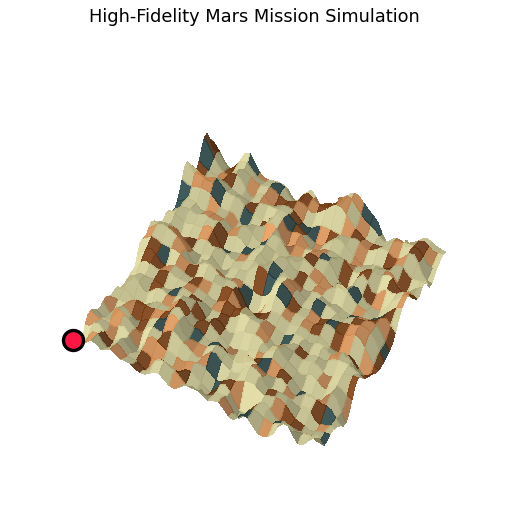

In [44]:
from scipy.ndimage import gaussian_filter
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import animation
from IPython.display import HTML

# Make inline animation embeds smaller/allowed
mpl.rcParams['animation.embed_limit'] = 100  # MB
mpl.rcParams['animation.bitrate'] = 1200     # lower bitrate → smaller video


def visualize_realistic_mission(elevation_map, terrain_map, path_coords):
    # 1. Smooth the Elevation Map for a "Real" Look
    # This turns sharp random spikes into rolling hills
    Z_smooth = gaussian_filter(elevation_map.astype(float), sigma=1.2)

    # 2. Interpolate Path for Smooth Continuous Movement
    # We generate intermediate steps between each grid point
    steps_per_move = 2  # fewer interpolated steps → fewer frames
    smooth_path_x = []
    smooth_path_y = []
    smooth_path_z = []

    for i in range(len(path_coords) - 1):
        p1 = path_coords[i]
        p2 = path_coords[i + 1]

        # Linearly interpolate X and Y coordinates
        xs = np.linspace(p1[1], p2[1], steps_per_move, endpoint=False)
        ys = np.linspace(p1[0], p2[0], steps_per_move, endpoint=False)

        # Get smoothed Z elevation for these points
        # Simple approximation: interp between the Z of the two nodes
        z1 = Z_smooth[p1[0], p1[1]]
        z2 = Z_smooth[p2[0], p2[1]]
        zs = np.linspace(z1, z2, steps_per_move, endpoint=False)

        smooth_path_x.extend(xs)
        smooth_path_y.extend(ys)
        smooth_path_z.extend(zs)

    # Append the final destination
    last = path_coords[-1]
    smooth_path_x.append(last[1])
    smooth_path_y.append(last[0])
    smooth_path_z.append(Z_smooth[last[0], last[1]])

    # 3. Setup the Scene
    # "More spread" -> significantly wider figure, but keep pixels reasonable
    fig = plt.figure(figsize=(12, 8), dpi=80)
    ax = fig.add_subplot(111, projection='3d')

    rows, cols = elevation_map.shape
    X, Y = np.meshgrid(np.arange(cols), np.arange(rows))

    # 4. Realistic Coloring
    # 0: Sand (PaleGoldenrod), 1: Rough (SandyBrown), 2: Rocky (SaddleBrown), 3: Cliff (DarkSlateGrey)
    real_colors = ['#EEE8AA', '#F4A460', '#8B4513', '#2F4F4F']
    cmap = colors.ListedColormap(real_colors)
    norm = colors.BoundaryNorm([0, 1, 2, 3, 4], cmap.N)

    # Map terrain categories to colors
    face_colors = cmap(norm(terrain_map))

    # Plot Surface using the SMOOTHED elevation
    surf = ax.plot_surface(X, Y, Z_smooth, facecolors=face_colors,
                           rstride=2, cstride=2, shade=True, alpha=0.9,
                           linewidth=0, antialiased=False)

    # Plot the faint trail of the planned path on the ground
    path_x_grid = [p[1] for p in path_coords]
    path_y_grid = [p[0] for p in path_coords]
    path_z_grid = [Z_smooth[p[0], p[1]] + 0.1 for p in path_coords]
    ax.plot(path_x_grid, path_y_grid, path_z_grid, color='white', linestyle=':', linewidth=1, alpha=0.5,
            label='Planned Route')

    # Create the Rover with high-visibility styling (bright red + halo)
    # Halo (slightly larger, semi-transparent white)
    halo, = ax.plot([], [], [], marker='o', markersize=24,
                    color='white', alpha=0.6, markeredgecolor='none',
                    zorder=2)
    # Foreground rover dot (bright red with bold black edge)
    rover, = ax.plot([], [], [], marker='o', markersize=18, color='#ff1744',
                     markeredgecolor='black', markeredgewidth=3, label='Rover',
                     zorder=3)

    # 5. Styling and View
    ax.set_title('High-Fidelity Mars Mission Simulation', fontsize=16, color='black')
    ax.set_axis_off()  # Hide axes for a more "cinematic" view

    # Adjust view to look "spread" out
    ax.view_init(elev=55, azim=-60)

    # Scale Z axis to not look too flat or too spiky
    ax.set_zlim(0, 15)

    def update(frame):
        cx = smooth_path_x[frame]
        cy = smooth_path_y[frame]
        cz = smooth_path_z[frame] + 0.6  # Lift rover slightly above terrain

        # Update halo first (underlay)
        halo.set_data([cx], [cy])
        halo.set_3d_properties([cz])
        # Update rover (overlay)
        rover.set_data([cx], [cy])
        rover.set_3d_properties([cz])
        return halo, rover

    # Animate
    # Ensure we actually render frames; avoid downsampling to prevent 0-duration
    frames = range(0, len(smooth_path_x))
    anim = animation.FuncAnimation(fig, update, frames=frames, interval=50, blit=False)

    # Do not close the figure here; some writers need it alive during save
    return anim


anim_real = visualize_realistic_mission(elevation, terrain, path)
anim_real.save('rover.mp4', writer='ffmpeg', fps=20, dpi=100, bitrate=1200)
from IPython.display import Video
Video('rover.mp4', embed=False)  # small notebook; external file playback
